# Кодрян Максим Станиславович, ММП ВМК МГУ, 517 группа

# ДЗ по первой лекции ПЗАД

## 1. Проверить наличие "желанных" свойств медианы для $d$-мерного обобщения как решения оптимизационной задачи

Напомним перечень свойств:
* Очевидные: устойчивость к выбросам, реальная точка из реальной выборки ~~реально~~
* Хочется: инвариантность (к поворотам, сдвигам, сжатиям и-тогдалие), совпадения с true медианой при $d = 1$...

Рассматриваем медиану как решение следующей оптимизационной задачи:
$$\sum_{i=1}^{m} \Vert x - a \Vert_p \longrightarrow \min_{a \in \{x_i\}_{i=1}^m},$$
где $\Vert x \Vert_p = (\sum_{j=1}^{d} |x|^p)^{1/p}$ &mdash; $p$-норма $d$-мерного вектора $x$, мдауш.

Для простоты ограничимся случаем $d = 2$ и случаями $p = 1, 2, +\inf$, то есть кандидаты на рассмотрение:
* $\sum_{i = 1}^m \left(|x_i - a_1| + |y_i - a_2| \right) \longrightarrow \min_{a \in \{x_i\}_{i=1}^m}$
* $\sum_{i = 1}^m \sqrt{|x_i - a_1|^2 + |y_i - a_2|^2 } \longrightarrow \min_{a \in \{x_i\}_{i=1}^m}$
* $\sum_{i = 1}^m \max\left(|x_i - a_1|, |y_i - a_2| \right) \longrightarrow \min_{a \in \{x_i\}_{i=1}^m}$

Во-первых, ясно, что решения данных оптимизационных задач &mdash; точки из выборки (удивительно, правда?), совпадают с реальной медианой в одномерном кейсе, инвариантны к сдвигам, скалярным сжатиям/растяжениям и поворотам (интуитивно ясно из свойств расстояния, но, естесна, можно показать строго, но мне лень, хех). 

Давайте посмотрим на инвариантность к нетривиальным (неравномерным по-другому) сжатиям-растяжениям и что с устойчивостью к выбросам.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def calc_p_norm(X, p=1):
    "Calculate p-norms for X in R^{..., d}, p >= 1"
    X = np.abs(X)
    
    if p < 1:
        print("Sorry, mate, not a norm...")
        return
    elif p < np.inf:
        return np.sum(X ** p, axis=-1) ** (1 / p)
    elif p == np.inf:
        return np.max(X, axis=-1)

    
def get_p_median_index(X, p=1):
    "Get index of the multidimensional p-median element of X in R^{m, d}, p >= 1"
    pairwise_dist = calc_p_norm(np.expand_dims(X, 0) - np.expand_dims(X, 1), p)
    dist_sums = np.sum(pairwise_dist, axis=1)
    median_ind = np.argmin(dist_sums)
    return median_ind

In [3]:
def plot_median(X, comment=""):
    median_1_ind = get_p_median_index(X, p=1)
    median_1 = X[median_1_ind]
    
    median_2_ind = get_p_median_index(X, p=2)
    median_2 = X[median_2_ind]
    
    median_inf_ind = get_p_median_index(X, p=np.inf)
    median_inf = X[median_inf_ind]
    
    print("1-median index: ", median_1_ind)
    print("2-median index: ", median_2_ind)
    print("inf-median index: ", median_inf_ind)
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("p-median demonstration " + comment)
    plt.scatter(X[:, 0], X[:, 1], marker='.')
    plt.scatter(median_1[0], median_1[1], marker='+', label="1-median")
    plt.scatter(median_2[0], median_2[1], marker='+', label="2-median")
    plt.scatter(median_inf[0], median_inf[1], marker='+', label="inf-median")
    plt.legend()
    plt.show()

In [4]:
# Generate our beautiful data
X = np.random.rand(100, 2)

1-median index:  54
2-median index:  12
inf-median index:  46


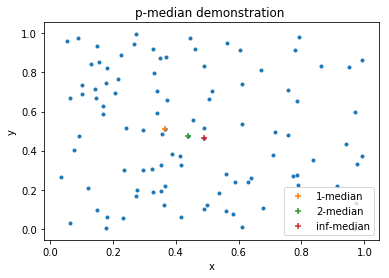

In [5]:
plot_median(X)

Итак, сжимаем-растягиваем:

In [6]:
# Define non-trivial squeezing matrix
A = np.array([[0.5, 0],
              [0, 2]])

1-median index:  41
2-median index:  12
inf-median index:  71


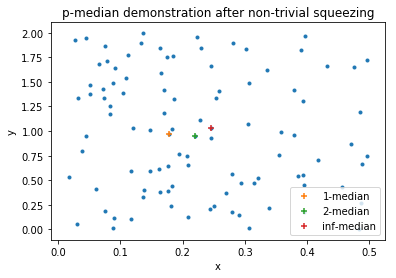

In [7]:
plot_median(X.dot(A), "after non-trivial squeezing")

Ну, сжатия-растяжения они, конечно, более-менее переносят, но не то чтобы 100% инвариантны.

Теперь к устойчивости:

In [8]:
# Add several outliers
X_ = np.vstack([X, 0.5 + 3 * np.random.randn(10, 2)])

1-median index:  41
2-median index:  12
inf-median index:  12


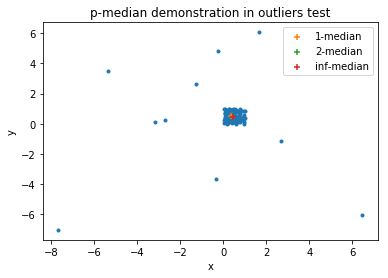

In [9]:
plot_median(X_, "in outliers test")

In [10]:
X_[12]

array([0.43864999, 0.47248433])

In [11]:
X_[41]

array([0.35679018, 0.48737124])

Ну, я бы сказал, что весьма устойчиво решение к выбросам так-то.

В общем, не такое уж и плохое обобщение вышло.

## 2. Проверить применимость формулы итерационного алгоритма в ОМК

Такс-такс-такс, что тут у нас, оптимизационная задача!

$$\sum_{i=1}^m f(x_i, a) \longrightarrow \min_a$$

Так, допустим, приравняли нулю производную (да, случай одномерный) и получили нечто такое:

$$\sum_{i=1}^m \psi(x_i - a) = \sum_{i=1}^m (x_i - a) \xi(x_i - a) = 0$$

Абсолютно очевидно (или нет?..) напрашивается следующая итеративная схема пересчета параметра $a$:

$$a^{t+1} = \frac{\sum_{i=1}^m x_i \xi(x_i - a^t)}{\sum_{i=1}^m \xi(x_i - a^t)}$$

Что гипотетически может пойти не так?

Ясно, что такая схема не прокатит, если, к примеру, знаменатель &mdash; нуль. Но $\xi$ называют *весовой* функцией, стало быть, неспроста. Давайте ограничимся следующим весьма интуитивным случаем:

$\xi(z) > 0 \forall z \in \mathbb{R}$ &mdash; веса будут положительными.

Так, из вида нашей итерационной схемы (которая по сути получается переносом свободной $a$-шки влево, а всего остального направо в уравнении для нуля производной $\sum_{i=1}^m (x_i - a) \xi(x_i - a) = 0$) понятно, что, меняя $a$ по такому алгоритму, из стационарной точки мы не выйдем. Уже хо-ро-шо. 

Более того, благодаря положительным весам можно считать, что каждая новая точка получается путем подсчета мат. ожидания от точек выборки по некоторому распределению, задающемуся весами, которые, в свою очередь, зависят от предыдущей точки. То есть каждая получающаяся из такой процедуры точка лежит где-то "посередине" относительно точек выборки (makes sense).

Что касается сходимости такого алгоритма, ничего определенного в столь общей постановке сказать не могу. Хотя вот, например, EM тоже не дает никаких замечательных гарантий относительно сходимости (сойдемся куда-то и ладно), но его ведь все так любят. 

## 3. "Выборки 10000 достаточно, но это чтобы оценить с точностью ±0.01 с вероятностью 99%" &mdash; так ли это?

Мда, ну и постановочка вопроса.

Так, окей, давайте прям максимально общо. Был такой товарищ, звали его Чебышёв. У него было неравенство (которое в теории вероятностей является так-то следствием неравенства товарища Маркова, но не суть), которое гласит, что для произвольной (ну, окей, с конечным вторым моментом) случайной величины $\xi$ справедливо:
$$\mathbb{P}(|\xi - \mu| \ge a) \le \frac{\sigma^2}{a^2}, \mu = \mathbb{E}\xi, \sigma^2 = \mathbb{D}\xi$$

А еще все мы знаем, что эмпирическое среднее $N$ iid случайных величин имеет то же мат. ожидание и в $N$ раз меньшую дисперсию.

Ну, вот, скрещивая два факта, узнаем, что:
$$\mathbb{P}(|\frac{1}{N}\sum_{i=1}^N \xi_i - \mu| \ge a) \le \frac{\sigma^2}{a^2 N}$$

Тааак, теперь подставляем чиселки $N = 10000$ и $a = 0.01$, оказывается:
$$\mathbb{P}(|\frac{1}{10^4}\sum_{i=1}^{10^4} \xi_i - \mu| \ge 10^{-2}) \le \sigma^2$$

Соответственно, раз нас интересует 99% гарантия, справа должно стоять одна сотая, то есть $\sigma^2 \le 10^{-2}$.

Допустим, мы хотим оценить вероятность события, проведя кучу независимых экспериментов, причём сделать оценку с необходимой точностью и вероятностью, угу. По сути имеем дело со случайной величиной $\xi \sim Bernoulli(p)$, параметр $p$ распределения которой мы желаем оценить.

Зная, что $\mathbb{E}\xi = p, \mathbb{D}\xi = p(1-p)$ и помня, что $\mathbb{D}\xi \le 10^{-2}$, находим, что при $p \in [0, 0.5 - 0.2\sqrt{6}] \cup [0.5 + 0.2\sqrt{6}, 1]$ мы находимся в той зоне, где мы гарантировано получаем желаемую оценку.

Вот только узковаты интервалы, конечно, потому что $0.5 - 0.2\sqrt{6} \approx 0.010102$, так что способ так себе. Можно, конечно, придумать и получше оценки (через ЦПТ какую-нибудь а-ля Муавра-Лапласа, например), но... :)

Давайте напоследок глянем, как ведёт себя дисперсия распределения Бернулли в зависимости от параметра $p$, чтобы знать, с какой (заведомо) вероятностью мы можем оценивать наш параметр в принципе.

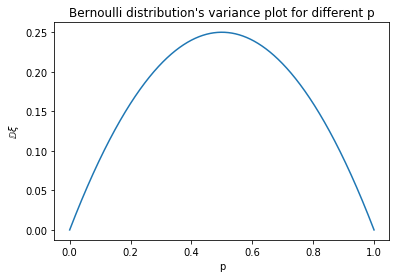

In [12]:
p = np.linspace(0, 1, 10000)

plt.xlabel('p')
plt.ylabel(r'$\mathbb{D}\xi$')
plt.title("Bernoulli distribution's variance plot for different p")
plt.plot(p, p * (1 - p))
plt.show()

Отсюда, кстати, становится ясно, что максимальная дисперсия распределения Бернулли: $\max_p \mathbb{D}\xi = 0.25$, а значит, нам заведомо хватит $N = 250000$ экспериментов, чтобы оценить параметр $p$ с точностью $\pm 0.01$ и вероятностью ошибки $1\%$.

## 4. Сколько нужно опросить перед выборами людей, чтобы получить достоверную оценку общественного мнения? Что здесь такое «достоверная»?

Давайте сделаем все интуитивно, ясно и прозрачно, так, чтобы даже ребенок понял. Введем вероятностное пространство $\left(\Omega, \mathcal{F}, \mathbb{P} \right)$, $\Omega$ &mdash; множество элементарных исходов (в нашем случае &mdash; люди, которых мы будем случайно выдергивать и опрашивать), $\mathcal{F}$ &mdash; сигма-алгебра событий (население у нас конечно, так что, так и быть, можно ограничиться просто алгеброй для *простоты*, а также будем полагать $\mathcal{F} = 2^\Omega$, дабы ни в чем себя не ограничивать) и $\mathbb{P}$ &mdash; вероятностная мера на нашей алгебре (пусть будет считающей, то бишь $\mathbb{P}(A) = \frac{|A|}{|\Omega|}, A \in \mathcal{F}$). Воооот, теперь можно на все вопросы грамотно ответить.

Значит, что мы делаем дальше. Допустим, у нас $K$ кандидатов. Введём для каждого из них на нашем вероятностном пространстве случайную величину $\xi_k(\omega) = \mathbb{1}[\omega\text{ голосует за кандидата }k]$. Дальше вводится вероятностное пространство случайных выборок размера $N$: $\left(\Omega^N, \mathcal{F}^N, \mathbb{P}^N \right)$, сэмплируется выборка, и мы возвращаемся к предыдущему пункту. Но тут есть маленький подвох: *такие случайные выборки могут содержать одного и того же человека несколько раз*. Конечно, в наших реалиях и не такое возможно, но хотелось бы немного поидеализировать (кстати говоря, мы также полагаем, что все голосуют, ну или у нас просто есть фиктивный кандидат).

Допустим, что каждая выборка &mdash; это совокупность из $N$ независимых (здесь под независимостью подразумевается следующее: опросив $m$ людей, следующего выбираем равновероятно из оставшихся $N - m$, так что независимость у нас, конечно, скорее, в бытовом смысле) опросов *разных* людей, то есть всего различных таких выборок может быть $A_{|\Omega|}^N$ (да, я понимаю, что порядок опрашиваемых не имеет значения, но так легче считать всякие доли, вероятности и моменты случайных величин, как будет видно далее; хотя, конечно, вероятности вроде "доля наборов с таким-то числом голосующих за $k$-го кандидата", которые нас и будут интересовать, очевидно, останутся теми же при любой трактовке: с учётом или без учёта порядка). 

Опять-таки рассмотрим случайную величину $\eta_k(\mathbf{\omega})$, которая будет возвращать долю голосующих за $k$-го кандидата в выборке $\mathbf{\omega}$. Понимаем, что $\eta_k(\mathbf{\omega}) = \frac{\sum_{i=1}^N \xi_{k;i}(\mathbf{\omega})}{N}$, где $\xi_{k;i}(\mathbf{\omega}) = \xi_{k}(\mathbf{\omega}[i])$ сообщает нам, проголосовал ли $i$-й человек в выборке за кандидата $k$. Заметим, что мат. ожидание такой случайной величины совпадает (с чем бы вы думали?) с долей голосующих за кандидата $k$ в генеральной совокупности &mdash; $p_k = \frac{\sum_{\omega \in \Omega} \xi_k(\omega)}{|\Omega|} = \mathbb{E}\xi_k$, что следует из линейности мат. ожидания и того, что вероятность встретить человека $\omega$ на $i$-й позиции в упорядоченном наборе равна $\frac{1}{|\Omega|}$, короче говоря, $\mathbb{E} \eta_k = \frac{\sum_{i=1}^N \mathbb{E}\xi_{k;i}}{N} = \mathbb{E}\xi_k = p_k$.

Итак, мат. ожидание случайной величины $\eta_k$, как мы выяснили, совпадает с параметром, который мы так хотим оценить, &mdash; с долей голосующих, которые предпочли кандидата $k$. Отлично, теперь чтобы получить **достоверную** (то есть с заданной *точностью* и *вероятностью выйти за пределы данной точности*) оценку данного параметра можно использовать трюк с неравенством Чебышева из пункта выше. Для этого нам нужна дисперсия. Если я нигде не напутал, должно получиться так: $\mathbb{D} \eta_k = \mathbb{E} \eta_k^2 - \left(\mathbb{E}\eta_k\right)^2 = \frac{\sum_{i=1}^N \mathbb{E}\xi^2_{k;i} + \sum_{i \ne j} \mathbb{E} \xi_{k;i}\xi_{k;j}}{N^2} - \left(\mathbb{E}\eta_k\right)^2 = \{\xi^2_{k;i} = \xi_{k;i}, \mathbb{E} \xi_{k;i}\xi_{k;j} = \mathbb{P}(\xi_{k;i} = 1, \xi_{k;j} = 1) = p_k \frac{p_k|\Omega| - 1}{|\Omega| - 1}, i \ne j \} = \frac{p_k(1 - p_k)\left(|\Omega| - N \right)}{N\left(|\Omega| - 1 \right)}$. 

Вроде при $N = |\Omega|$ и $N = 1$ получаются точные формулы, ну и маленький sanity check напоследок:

In [13]:
import itertools
omega = np.zeros(10)  # 10 people population
omega[:4] = 1  # 40% vote right
N = 3  # ask 3 person

In [14]:
# Check permutations variant

eta_mean = 0
eta_2_mean = 0

for n_exp, sample in enumerate(itertools.permutations(omega, N)):
    eta = np.mean(sample)
    eta_mean += eta
    eta_2_mean += eta ** 2
    
n_exp += 1
eta_mean /= n_exp
eta_2_mean /= n_exp

p = omega.mean()
O = omega.size
var = p * (1 - p) * (O - N) / (N * (O - 1))

print("Mean is correct: ", np.allclose(eta_mean, p))
print("Variance is correct: ", np.allclose(eta_2_mean - eta_mean ** 2, var))

Mean is correct:  True
Variance is correct:  True


In [15]:
# Check combinations variant

eta_mean = 0
eta_2_mean = 0

for n_exp, sample in enumerate(itertools.combinations(omega, N)):
    eta = np.mean(sample)
    eta_mean += eta
    eta_2_mean += eta ** 2
    
n_exp += 1
eta_mean /= n_exp
eta_2_mean /= n_exp

p = omega.mean()
O = omega.size
var = p * (1 - p) * (O - N) / (N * (O - 1))

print("Mean is correct: ", np.allclose(eta_mean, p))
print("Variance is correct: ", np.allclose(eta_2_mean - eta_mean ** 2, var))

Mean is correct:  True
Variance is correct:  True


Кажется, ничего... Как бы то ни было, положим, я прав. Как выбрать число опрашиваемых так, чтобы с вероятностью $99\%$ оставаться в пределах одной сотой от реальной доли голосующих за кандидата $k$ (то есть от среднего)? Снова приходим (см. предыдущий пункт) к тому, что для этого требуется $\mathbb{D} \eta_k \le 10^{-6}$. Нетрудно видеть, что исходя из нашей формулы $\mathbb{D} \eta_k \le \frac{1}{4N}$, поэтому **нам заведомо достаточно $N \ge 250000$** (считаем, что популяция у нас достаточно большая, не в деревне опросы проводим). Весьма интересный результат все-таки!

Ну и маленький экспериментик напоследок:

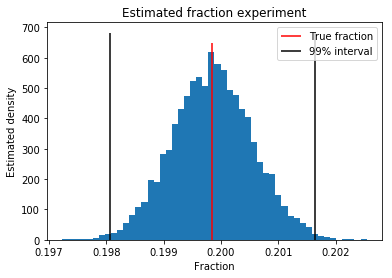

In [16]:
omega = np.random.binomial(1, 0.2, 1000000)  # 1 million people
N = 250000  # Ask 25% of population
n_exp = 10000  # 10 thousand times
sample_means = []

for _ in range(n_exp):
    sample = np.random.choice(omega, N, replace=False)
    sample_means.append(sample.mean())
    
plt.title("Estimated fraction experiment")
plt.xlabel("Fraction")
plt.ylabel("Estimated density")
plt.hist(sample_means, bins=50, density=True)
plt.vlines(omega.mean(), 0, plt.ylim()[1], color='red', label="True fraction")
plt.vlines(np.percentile(sample_means, [0.5, 99.5]), 0, plt.ylim()[1], label="99% interval")
plt.legend()
plt.show()

Я бы провёл экспериментик с большей популяцией, но у меня комп слабоват... :(

Anyway, весьма занимательно, не правда ли? Оценка через неравенство Чебышева слишком консервативна (~ в 10 раз), но зато универсальна.

Черт возьми, но как же все-таки интересно получается с этим магическим числом $250 000$!

## 5. В чем слабость наших аргументов (в задаче зодиакального скоринга)?

Ладно, давайте разбираться...

Итак, мы говорим, что выводы в статье про зодиакальный скоринг (такие-то знаки зодиака возвращают долги хуже, чем такие-то) не совсем корректны, потому что процент должников оценивался по сравнительно небольшой подвыборке для каждого знака, а потому полученные "вероятности задолжать" для каждого знака весьма неустойчивы, особенно если учитываются доли процента. К тому же подобные рейтинги оказываются еще и неустойчивы по времени, что показал эксперимент с б**о**льшим числом респондентов.

В чем же слабость подобной аргументации? Вроде все более-менее логично.

Окей, неустойчивы проценты, и неустойчивы закономерности по времени. Но допустим, нас не столько интересуют конкретные вероятности в перспективе, сколько сам *рейтинг знаков-должников*, причем *на данный момент времени*. То есть да, указывать вероятности с точностью до долей процентов в данном случае не совсем корректно, тем более использовать их в каких-нибудь долгосрочных исследованиях, но **порядок**, в котором на текущий момент выстроились знаки зодиака в данном рейтинге должников, &mdash; вещь куда более устойчивая к погрешностям измерения, чем конкретные величины вероятностей, что логично и интуитивно ясно.

Ну, и маленький экспериментик напоследок!

Возьмем три Бернуллиевские случайные величины с $p = 0.2, 0.225, 0.25$ соответственно, просэмплируем $1000$ раз каждую, усредним, упорядочим и посмотрим, какова эмпирическая вероятность нарушить их естественный порядок следования.

In [17]:
order_list = []

for _ in range(1000000):
    p_1 = np.random.binomial(1, 0.2, 1000).mean()
    p_2 = np.random.binomial(1, 0.225, 1000).mean()
    p_3 = np.random.binomial(1, 0.25, 1000).mean()
    order_list.append(np.argsort([p_1, p_2, p_3]))
    
order_list = np.array(order_list)
print("Wrong order empirical probability: ", np.mean(order_list != np.arange(3)))

Wrong order empirical probability:  0.11523633333333333


Ну вот, всего в $\approx 11.5 \%$ случаев ошибаемся с порядком, хотя каждая величина всего тысячу раз сэмплируется и сами $p$-шки достаточно близки. Так что да, порядок вероятностей &mdash; вещь более устойчивая по отношению к количеству экспериментов, чем конкретные какие-то там значения вероятностей, вот так.

Так что, возможно, составленный *на тот момент времени* рейтинг знаков-должников все же верный.

## 6. Другие способы обобщения медианы на многомерный случай...

Не знаю уж, почему его на лекции сразу отвергли, но мне этот способ сразу пришёл в голову: 

1) Посчитать маргинальные одномерные медианы по каждой координате;

2) Получить эдакую прото-медиану в многомерном пространстве;

3) Найти ближайшую к ней (в вашей любимой метрике) точку из исходной выборки.

Ну чем плохо?

Смотрите:
* *Реальная точка из выборки* &mdash; **есть** по определению, так сказать;
* *В одномерном случае совпадает с медианой* &mdash; **есть** по определению, так сказать x2;
* *Устойчивость к выбросам* &mdash; **есть**, так как одномерные медианы устойчивы;
* *Инвариантность к скалярному масштабированию и переносам* &mdash; **есть** по свойствам одномерной медианы и метрики (ограничимся нормированным случаем)...

Ну, нет устойчивости ко всяким поворотам и нетривиальным сжатиям/растяжениям &mdash; ну и что, подумаешь! Да кому это вообще надо? Meh...

Зато представьте, например, случай, когда точки расположены (приблизительно) вдоль прямой на плоскости. Способ с выпуклой оболочкой объявит медианой весь набор точек, а такой выделит одну, true-медиану, что куда более интуитивно!

Итак, эээээээээээээээээээээээээксперименты!

Сравним такую медиану с теми, что мы проверяли выше.

In [18]:
def get_custom_median_index(X, p=2):
    "Get index of the multidimensional custom median element of X in R^{m, d}, using p-norm metrics for p >= 1"
    proto_median = np.median(X, axis=0)
    dists = calc_p_norm(X - proto_median, p)
    median_ind = np.argmin(dists)
    return median_ind

In [19]:
def plot_median_custom(X, comment=""):
    median_1_ind = get_p_median_index(X, p=1)
    median_1 = X[median_1_ind]
    
    median_2_ind = get_p_median_index(X, p=2)
    median_2 = X[median_2_ind]
    
    median_inf_ind = get_p_median_index(X, p=np.inf)
    median_inf = X[median_inf_ind]
    
    median_custom_ind = get_custom_median_index(X)
    median_custom = X[median_custom_ind]
    
    print("1-median index: ", median_1_ind)
    print("2-median index: ", median_2_ind)
    print("inf-median index: ", median_inf_ind)
    print("custom median index: ", median_custom_ind)
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Median demonstration " + comment)
    plt.scatter(X[:, 0], X[:, 1], marker='.')
    plt.scatter(median_1[0], median_1[1], marker='+', label="1-median")
    plt.scatter(median_2[0], median_2[1], marker='+', label="2-median")
    plt.scatter(median_inf[0], median_inf[1], marker='+', label="inf-median")
    plt.scatter(median_custom[0], median_custom[1], marker='+', label="custom median")
    plt.legend()
    plt.show()

In [20]:
X = np.random.rand(100, 2)

1-median index:  53
2-median index:  53
inf-median index:  14
custom median index:  53


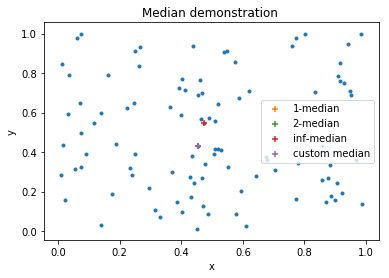

In [21]:
plot_median_custom(X)

1-median index:  53
2-median index:  53
inf-median index:  53
custom median index:  53


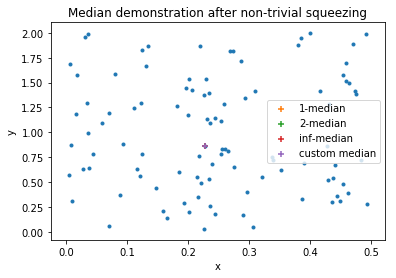

In [22]:
A = np.array([[0.5, 0],
              [0, 2]])
plot_median_custom(X.dot(A), "after non-trivial squeezing")

1-median index:  46
2-median index:  46
inf-median index:  46
custom median index:  46


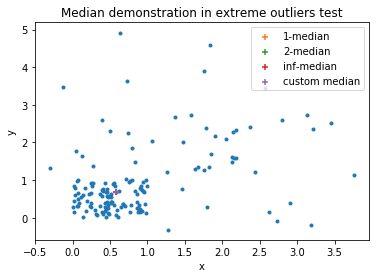

In [23]:
X_ = np.vstack([X, 2 + 1 * np.random.randn(50, 2)])
plot_median_custom(X_, "in extreme outliers test")

In [24]:
%timeit get_custom_median_index(np.random.rand(500, 50))

1.07 ms ± 4.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
%timeit get_p_median_index(np.random.rand(500, 50))

217 ms ± 7.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Вроде бы результаты приблизительно те же (ну, в двумерном случае, ок), а работает мой способ быстрее. И на том спасибо!

### Такие дела...